# Introduction to Deep Learning - Lab 3

### Objective

In this third tutorial you will learn how to use convolutional deep neural networks to perform image classification.

The first part of the Tutorial will be about a simple dataset called MNIST, where the goal is to classify hand-written digits. You will implement a first small Convolutional Architecture.

In the second part of the tutorial you will work on a more complex dataset to detect forest fires. You will see that the small CNN model has trouble classifying this dataset and we will try to implement more complex networks.

We are going to manually implement a **tiny convolution** to understand how Convolutional Neural Networks (CNNs) work.  

### Given Objects

1. **Input image** $ \mathbf{X} \in \mathbb{R}^{H \times W \times C_{in}} $  
   - Height $H = 4$, Width $W = 4$, Input channels $C_{in} = 3$  
   - Example: RGB image of size 4x4

2. **Kernel (filter)** $ \mathbf{K} \in \mathbb{R}^{C_{out} \times K_H \times K_W \times C_{in}} $  
   - $C_{out} = 2$ output channels  
   - Kernel size $K_H = 2$, $K_W = 2$  
   - Each output channel has one kernel per input channel

3. **Output feature map** $ \mathbf{Y} \in \mathbb{R}^{C_{out} \times H_{out} \times W_{out}} $  
   - Height: $H_{out} = H - K_H + 1$  
   - Width: $W_{out} = W - K_W + 1$  
   - Computed by sliding each kernel over the input and summing over all channels:

$$
\mathbf{Y}[o, i, j] = \sum_{c=0}^{C_{in}-1} \sum_{u=0}^{K_H-1} \sum_{v=0}^{K_W-1}
\mathbf{X}[i+u, j+v, c] \cdot \mathbf{K}[o, u, v, c]
$$

- $o \in \{0, \dots, C_{out}-1\}$ – output channel  
- $i \in \{0, \dots, H_{out}-1\}$, $j \in \{0, \dots, W_{out}-1\}$ – spatial positions  

---

#### Goal of the Exercise

1. Implement the **kernel** $\mathbf{K}$ (two filters, random values).  
2. Compute the **output size** $(H_{out}, W_{out})$.  
3. Initialize the **feature maps** $\mathbf{Y}$.  
4. Compute the **manual convolution** using for-loops over channels, height, and width.  

> Tip: Think of the convolution as sliding a small window (kernel) over the image and computing **weighted sums per output channel**.


In [1]:
import numpy as np

# =========================================
# CONTEXT: Tiny convolution to understand CNNs
# 4x4 RGB image (C_in=3)
# 2 filters of size 2x2 → 2 output channels (C_out=2)
# =========================================

# -------------------
# Input image (4x4 RGB)
# -------------------
image = np.array([
    [[1,0,2], [2,1,0], [0,1,1], [1,2,0]],
    [[0,2,1], [1,0,2], [2,1,1], [0,0,1]],
    [[1,1,0], [0,2,2], [1,1,1], [2,0,1]],
    [[2,0,1], [1,1,0], [0,2,2], [1,1,1]]
])

H, W, C_in = image.shape
print("Input image (H,W,C_in):\n", image)
print("Shape:", image.shape, "\n")

# -------------------
# Two filters for C_out=2
# Shape: (C_out, KH, KW, C_in)
# -------------------

### TODO: implemente the kernel (the two filters, fill with random values)
kernel = np.random.rand(2, 2, 2, 2)
###

print("Kernel shape:", kernel.shape, "\n")
C_out, K_h, K_w, C_in  = kernel.shape
# -------------------
# Compute output size (stride=1, no padding)
# -------------------
### TODO: compute the output size
out_H = H - 1
out_W = W - 1
###
print(f"Output feature map size: (H_out, W_out) = ({out_H}, {out_W})\n")

# -------------------
# Initialize output feature maps
# -------------------
### TODO: Compute the output shape

C_out = 2
output_shape = (C_out, out_H, out_W)
###

feature_maps = np.zeros(output_shape)

# -------------------
# Manual convolution
# -------------------
### TODO: implemente the convolution by hand (with for loops on channels, height and width)
count = 0
for o in range(C_out):
  for i in range(out_H):
    for j in range(out_W):
      for c in range(C_in):
        for u in range(K_h):
          for v in range(K_w):
            print(o, i, j, c, u, v, count)
            feature_maps[o, i, j] += image[i + u, j + v, c] * kernel[o, u, v, c]
            count += 1

print("Output shape:", )
print("\nThis exactly corresponds to nn.Conv2d(in_channels=3, out_channels=2, kernel_size=2) in PyTorch.")


Input image (H,W,C_in):
 [[[1 0 2]
  [2 1 0]
  [0 1 1]
  [1 2 0]]

 [[0 2 1]
  [1 0 2]
  [2 1 1]
  [0 0 1]]

 [[1 1 0]
  [0 2 2]
  [1 1 1]
  [2 0 1]]

 [[2 0 1]
  [1 1 0]
  [0 2 2]
  [1 1 1]]]
Shape: (4, 4, 3) 

Kernel shape: (2, 2, 2, 2) 

Output feature map size: (H_out, W_out) = (3, 3)

0 0 0 0 0 0 0
0 0 0 0 0 1 1
0 0 0 0 1 0 2
0 0 0 0 1 1 3
0 0 0 1 0 0 4
0 0 0 1 0 1 5
0 0 0 1 1 0 6
0 0 0 1 1 1 7
0 0 1 0 0 0 8
0 0 1 0 0 1 9
0 0 1 0 1 0 10
0 0 1 0 1 1 11
0 0 1 1 0 0 12
0 0 1 1 0 1 13
0 0 1 1 1 0 14
0 0 1 1 1 1 15
0 0 2 0 0 0 16
0 0 2 0 0 1 17
0 0 2 0 1 0 18
0 0 2 0 1 1 19
0 0 2 1 0 0 20
0 0 2 1 0 1 21
0 0 2 1 1 0 22
0 0 2 1 1 1 23
0 1 0 0 0 0 24
0 1 0 0 0 1 25
0 1 0 0 1 0 26
0 1 0 0 1 1 27
0 1 0 1 0 0 28
0 1 0 1 0 1 29
0 1 0 1 1 0 30
0 1 0 1 1 1 31
0 1 1 0 0 0 32
0 1 1 0 0 1 33
0 1 1 0 1 0 34
0 1 1 0 1 1 35
0 1 1 1 0 0 36
0 1 1 1 0 1 37
0 1 1 1 1 0 38
0 1 1 1 1 1 39
0 1 2 0 0 0 40
0 1 2 0 0 1 41
0 1 2 0 1 0 42
0 1 2 0 1 1 43
0 1 2 1 0 0 44
0 1 2 1 0 1 45
0 1 2 1 1 0 46
0 1 2 1 1 1 47

During this lab you will also learn how to train a Deep Neural Networks on a GPU. It is not automatically done on Pytorch. If you don't have any GPU on your personal laptop, I encourage you to use colab.

In [20]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# If you are working on colab: to enable the GPU go to modify > notebook's parameters and select "T4 GPU".

# This should display "cuda:0"
print(device)

cuda:0


### MNIST

The first dataset you will be working on is called MNIST. This dataset is so widely used among the Deep Learning community that PyTorch offers an already implemented Dataset.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

MEAN_MNIST = (0.1307,)
STD_MNIST = (0.3081,)

# We define an auto
transform_mnist = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(MEAN_MNIST, STD_MNIST)])

batch_size = 512

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform_mnist)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform_mnist)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

print("Size train loader: ", len(trainloader), " | test loader: ", len(testloader))

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.95MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.0MB/s]

Size train loader:  118  | test loader:  20


The train loader contains 118 batches of 512 (=the batch size) pairs of (image, labels). The test loader contains 20 batches of 512 pairs. We can access the first batch using ```images, labels = next(iter(loader))```. ```images``` will be a ```torch.tensor``` containing 512 (=batch_size) images and ```labels``` will be a ```torch.tensor``` containing 512 labels (values from 0 to 9).

In [3]:
### TODO
# Display the shape and label of the first image from the train loader.
images, labels = next(iter(trainloader))
print(images[0].numpy().shape)
print(labels[0].numpy())

(1, 28, 28)
5


You should have noticed that each image in the data set has a shape of (1, 28, 28). The 1 corresponds to the number of channels, i.e. the intensity of a color. In our case, we have grayscale images, so there is one channel for gray intensity. If you have color images, the data will have 3 channels for red intensity, green intensity, and blue intensity (RGB). The two 28 represent the shape of the image (28 pixels $\times$ 28 pixels). We will look at what the images look like.

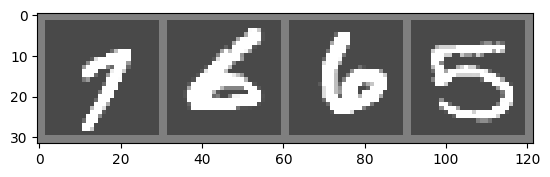

Labels:      7             6             6             5 

Image shape (number of channels, height, width): (1, 28, 28)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images, labels = images[:4], labels[:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels:     ','             '.join(f'{labels[j]}' for j in range(4)), '\n')
print(f'Image shape (number of channels, height, width): {tuple(images[0].shape)}')

You saw in [class](https://www.yvenn-amara.com/wp-content/uploads/2025/01/4.-Reseaux-Convolutionnels.pdf) this morning, that several layers are well-performing to treat image data. They are all implemented in Pytorch.


*   **2D Convolution Layers:** ```torch.nn.Conv2d``` (https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). The input should have this format: *(batch size (B), number of channels (C), height (H), width (W))*. It takes as main arguments:
  - The number of input channels
  - The convolution kernel size
  - The number of output channels
*   **2D Pooling Layers:** You have two kinds of pooling, ```torch.nn.MaxPool2d```(https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and ```torch.nn.AvgPool2d```(https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html). They take the same kind of input as the convolution (N, C, H, W). They take as arguments:
  - The pooling kernel size
* **Fully-connected Layers:** You already saw them over the past two weeks: ```torch.nn.Linear```. Do not forget that they take as parameter the last dimension of your input vector!

One last thing... When performing classification, we usually use a ```nn.Softmax()``` as output activation function. **The output of your network will be the probabilities of your input to belong to each of the classes. But, the CrossEntropyLoss already integrates the softmax.**




Start by implementing a simple convolutional model:

- Convolution, with a kernel of size 3 and 5 output channels
- MaxPooling, with a kernel of size 2
- A flatten layer: ```nn.Flatten``` to convert your 2D input into a 1D output.
- A final Linear Layer
- Use a relu activation fonction (```nn.ReLU()```) after the convolution layer

Do not forget to compute the input shape for each layer.

**Tip:** if you are uncertain of the output shape after a layer, you can always try to compute it on a fake layer like this:

In [5]:
import torch.nn as nn

# Fake data with the same shape as our data:
x = torch.randn(batch_size,1,28,28)
activation = nn.ReLU()
conv = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3)

print('The output of a convolution with 5 output channels and a kernel size of 3 will be:', conv(x).shape)

pool = nn.MaxPool2d(2)

flatten = nn.Flatten()
print('The output of a flatten layer will be:', flatten(x).shape)

linear = nn.Linear(5 * 13 * 13, 10)
activation = nn.ReLU()


print('The output of a conv layer will be:', (conv(x)).shape)
print('The output of a conv layer after ReLU will be:', (activation(conv(x))))
print('The output of a pool layer will be:', (pool(conv(x))).shape)
print('The output of a flatten layer will be:', flatten((pool(conv(x)))).shape)
print('The output of a linear layer will be:', linear(flatten((pool(conv(x))))).shape)


The output of a convolution with 5 output channels and a kernel size of 3 will be: torch.Size([512, 5, 26, 26])
The output of a flatten layer will be: torch.Size([512, 784])
The output of a conv layer will be: torch.Size([512, 5, 26, 26])
The output of a conv layer after ReLU will be: tensor([[[[0.0000e+00, 1.2222e-01, 0.0000e+00,  ..., 0.0000e+00,
           1.0384e+00, 0.0000e+00],
          [0.0000e+00, 1.0515e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 2.5803e-01],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.1906e-01,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 1.1402e-01,  ..., 0.0000e+00,
           3.5308e-01, 1.4324e-03],
          [0.0000e+00, 0.0000e+00, 1.7072e-01,  ..., 0.0000e+00,
           2.6577e-02, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 1.1442e-01,  ..., 0.0000e+00,
           0.0000e+00, 8.7714e-01]],

         [[6.8890e-01, 0.0000e+00, 0.0000e+00,  ..., 4.1225e-02,
           0.0000e+00, 0.0

Now try to implement this model!

In [17]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, input_channels, output_channels, output_shape):
        super().__init__()
        self.activation_relu = nn.ReLU()
        self.conv = nn.Conv2d(in_channels=input_channels, out_channels=output_channels, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(output_channels * 13 * 13, output_shape)
        self.activation = nn.Softmax()


    def forward(self, x):
        x_conv = self.conv(x)
        x_conv = self.activation_relu(x_conv)
        x_pool = self.pool(x_conv)
        x_flatten = self.flatten(x_pool)
        x_linear = self.linear(x_flatten)
        x_activation = self.activation(x_linear)
        return x_activation

We will train the model on both a CPU and GPU device so you can see the difference between the two training times.

In [18]:
import torch.optim as optim
import torch.nn as nn
import time

### TODO
input_channels=1
output_shape=10
criterion = nn.CrossEntropyLoss()
###


def build_and_train_model(archi=SimpleCNN, trainloader=trainloader, input_shape=input_channels, output_shape=output_shape, optimizer=optim.SGD, criterion=criterion, device="cpu", n_epochs=10, lr=0.01):
  ### TODO implement the training loop

  # When building a model, you can assign it to a particular device by setting: model = model.to(device)
  # device can be a string, like "cpu" our "cuda:0"
  device = "cuda:0"
  model = SimpleCNN(input_channels, 5, output_shape).to(device)
  optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
  for epoch in range(n_epochs):  # loop over the dataset multiple times
    epoch_loss = 0.0
    for i, (x,y) in enumerate(trainloader):
      # Same as for the model, you have to assign a device for your inputs and your label, for example: x = x.to(device)
      inputs = x.to(device)
      labels = y.to(device)
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      pred = model(inputs)
      loss = criterion(pred, labels)
      loss.backward()
      optimizer.step()
      # print statistics
      epoch_loss += loss.item()

    print(f'Epoch {epoch} / {n_epochs} | Loss: {epoch_loss / len(trainloader)}')
    running_loss = 0.0
  return model

In [13]:
# Colab is using T4 GPUs which are not very fast but you should see that they are still a bit faster than the CPUs

# With a GPU:
start_time = time.time()
model_gpu = build_and_train_model(device=device)
print(f"Training with {device} lasts: {np.round((time.time()-start_time)/60,2)} minutes\n")

# With a CPU
start_time = time.time()
model_cpu = build_and_train_model(device="cpu")
print(f"Training with a CPU lasts: {np.round((time.time()-start_time)/60,2)} minutes")

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0 / 10 | Loss: 1.898412142769765
Epoch 1 / 10 | Loss: 1.6106767502881714
Epoch 2 / 10 | Loss: 1.5713583311792148
Epoch 3 / 10 | Loss: 1.5630937178256148
Epoch 4 / 10 | Loss: 1.5584352349830886
Epoch 5 / 10 | Loss: 1.5554436253289046
Epoch 6 / 10 | Loss: 1.552792466292947
Epoch 7 / 10 | Loss: 1.550212767164586
Epoch 8 / 10 | Loss: 1.5485396678164853
Epoch 9 / 10 | Loss: 1.5465403007248701
Training with cuda:0 lasts: 1.8 minutes

Epoch 0 / 10 | Loss: 1.9214433350805509
Epoch 1 / 10 | Loss: 1.5944331561104725
Epoch 2 / 10 | Loss: 1.5669809408107047
Epoch 3 / 10 | Loss: 1.5581000002764038
Epoch 4 / 10 | Loss: 1.5511711613606598
Epoch 5 / 10 | Loss: 1.5465524045087524
Epoch 6 / 10 | Loss: 1.5423905778739413
Epoch 7 / 10 | Loss: 1.5382629845101954
Epoch 8 / 10 | Loss: 1.5351564025474806
Epoch 9 / 10 | Loss: 1.5324090486865933
Training with a CPU lasts: 1.77 minutes


In [14]:
model_gpu.device

AttributeError: 'SimpleCNN' object has no attribute 'device'

In [63]:
# Once your model has been train, you have to evaluate it on the test set.
def test_loop(dataloader, model, loss_fn, device):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
      for X, y in dataloader:
          model = model.to(device)
          ### TODO: compute the model final prediction and the number of correct predictions.
          pred = model(X.to(device))
          loss = loss_fn(pred, y.to(device)).item()
          test_loss += loss
          # Your current output is the [probability] for each class to be the right one.
          prediction = pred.to("cpu").argmax(axis=1)
          prediction = prediction.to("cpu")
          y_cpu = y.to("cpu").float()

          # To compute the accuracy score, we need to know how many correct predictions we got.
          correct += (prediction == y_cpu).sum().float()
          ###
    test_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print(f"Test Error: Accuracy: {(100*correct.item()):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss


In [16]:
print("GPU model:")
loss_gpu = test_loop(testloader, model_gpu, criterion, device)
print("\nCPU model:")
loss_cpu = test_loop(testloader, model_cpu, criterion, "cpu")

GPU model:
Test Error: Accuracy: 92.0%, Avg loss: 1.545872 


CPU model:
Test Error: Accuracy: 93.8%, Avg loss: 1.529544 



Just by curiosity, we can now have a look at how the network is treating the input images, layer by layer. You can change the value of idx if you want to take a look at another number.

Input Image


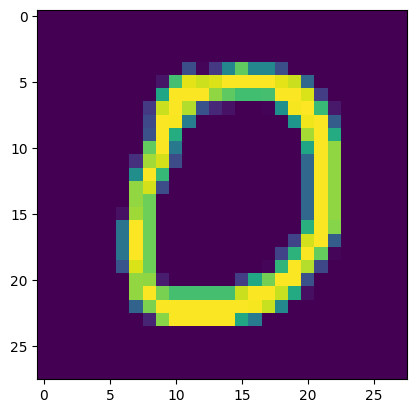


After the convolution and the pooling layers

Layer 0


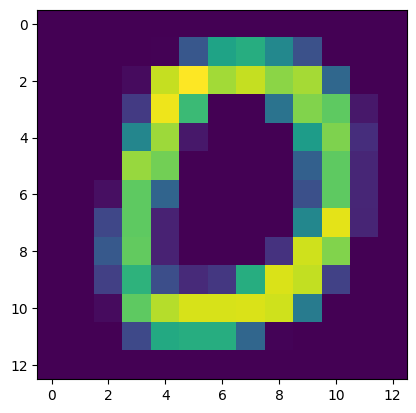

Layer 1


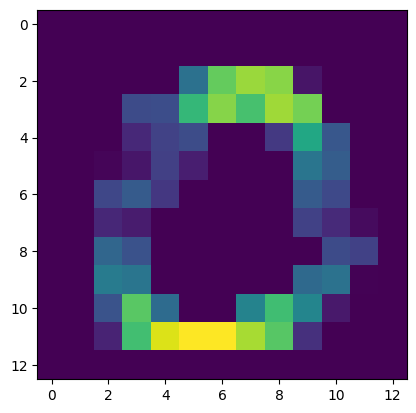

Layer 2


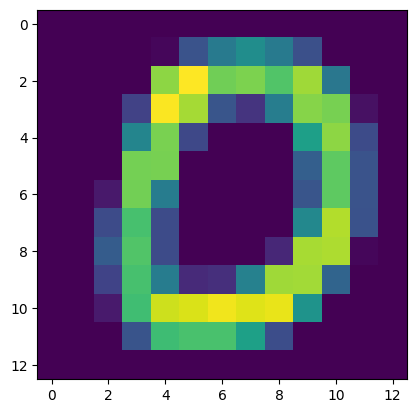

Layer 3


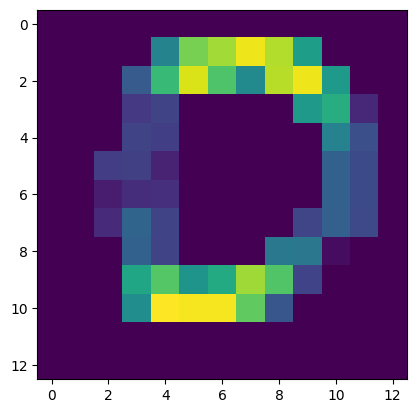

Layer 4


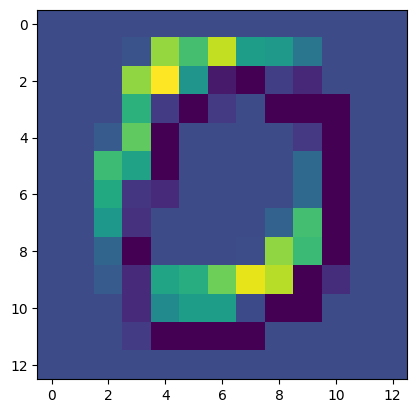

In [17]:
idx=10
x = next(iter(testloader))[0]
print("Input Image")
plt.imshow(x[idx][0].detach().cpu().numpy())
plt.show()

print("\nAfter the convolution and the pooling layers\n")

for i in range(5):
  print(f'Layer {i}')
  plt.imshow(model_cpu.pool(nn.ReLU()(model_cpu.conv(x)))[idx].detach().cpu().numpy()[i])
  plt.show()

After the pooling and the convolution layers, the number can still be recognize. But after the flatten layer it's another story!

After the flatten layer


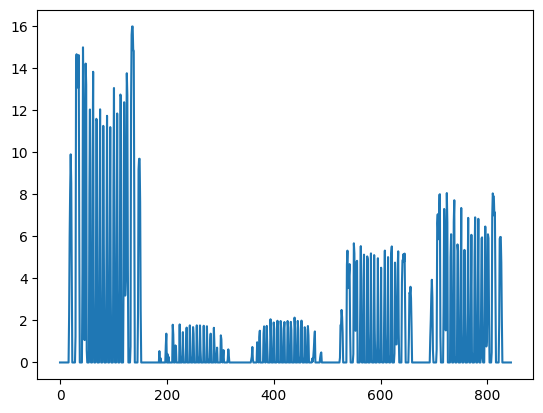


Final probabilities:  [0.9999727010726929, 6.012521805005075e-25, 2.215384542481047e-09, 1.4101656731213552e-08, 8.061538469796109e-22, 2.7011918064090423e-05, 1.5279132668279127e-13, 3.982119330145991e-19, 2.642761103288649e-07, 8.71241308765331e-22] 

Final prediction:  0 



In [ ]:
print("After the flatten layer")

plt.plot(nn.Flatten()(model_cpu.pool(nn.ReLU()(model_cpu.conv(x))))[idx].detach().cpu().numpy())
plt.show()

print("\nFinal probabilities: ", model_cpu(x)[idx].detach().tolist(), "\n")
print("Final prediction: ", np.argmax(model_cpu(x)[idx].detach().tolist()), "\n")

### Forest Fires

These capabilities have been widely exploited to design systems for facial recognition and object detection for autonomous cars, among other applications. More recently, a branch of research called Climate Informatics is attempting to use artificial intelligence methods, and in particular neural networks, to adapt to, mitigate and understand the impacts of global warming. One applications of Climate Informatics is the detection of extreme events. Let's take a look at how neural networks can be used to detect smoke or fire in forest images. This model could then be used on camera images, for example, to automatically detect fire starts.

We are going to use an open-source dataset available on Kaggle: https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4.


We will use the [`opendatasets`](https://github.com/JovianML/opendatasets) library to download the dataset from Kaggle. `opendatasets` uses the [Kaggle Official API](https://github.com/Kaggle/kaggle-api) for downloading datasets from Kaggle.  Follow these steps to find your API credentials:

1. Sign in to  [https://kaggle.com/](https://kaggle.com),  then click on your profile picture on the top right and select "My Account" from the menu.

2. Clik on "Settings" on the rightn then scroll down to the "API" section and click "Create New API Token". This will download a file `kaggle.json` with the following contents:

```
{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
```

3. When you run `opendatsets.download`, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.

Note that you need to download the `kaggle.json` file only once. On Google Colab, you can also upload the `kaggle.json` file using the files tab, and the credentials will be read automatically.

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4"
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4


100%|██████████| 123M/123M [00:00<00:00, 1.67GB/s]

This dataset contains 4800 images of various forest conditions across 4 classes: fire, no fire, smoke, and smokefire. The task's goal would be to design a model able to classify the images among those four categories. The dataset is well-balanced, meaning we have as many images in each category. When downloading the dataset, it is automatically divided into a train, a validation and a test set.

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

data_dir = "./forest-fire-c4/Forect Fire/Forest Fire_Dataset" # Where the images are locally stored
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


transform = transforms.Compose([
    transforms.RandomResizedCrop(225),  # Reshape to (225, 225)
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalization
])

train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)

trainloader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
)
valloader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=True,
)
testloader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=True,
)

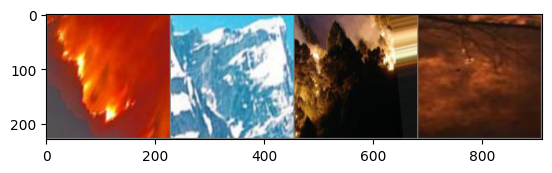

Labels:   Fire          No Fire         Smoke Fire         Fire  

Image shape (number of channels, height, width): (3, 225, 225)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
classes = ['Fire', 'No Fire', 'Smoke', 'Smoke Fire']
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images, labels = images[:4], labels[:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels:  ','         '.join(f'{classes[labels[j]]:5s}' for j in range(4)), '\n')
print(f'Image shape (number of channels, height, width): {tuple(images[0].shape)}')

We will create a simple model with the same architecture as below. But be careful with the shape of the new input images, some values may change!

In [91]:
class WildFireCNN(nn.Module):
    def __init__(self, input_channels, output_channels, output_shape):
        super().__init__()
        self.activation_relu = nn.ReLU()
        self.conv = nn.Conv2d(in_channels=input_channels, out_channels=output_channels, kernel_size=4)
        self.pool = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        dim_after = (225 - 3) // 2
        self.linear = nn.Linear(output_channels * dim_after * dim_after, output_shape)
        self.activation = nn.Softmax()


    def forward(self, x):
        x_conv = self.conv(x)
        x_conv = self.activation_relu(x_conv)
        x_pool = self.pool(x_conv)
        x_flatten = self.flatten(x_pool)
        x_linear = self.linear(x_flatten)
        x_activation = self.activation(x_linear)
        print(x_activation.shape
              )
        return x_activation


For the training we will use the validation data to stop the training using an early stopping when the validation loss starts increasing. The typical workflow will be:
- For each epoch:
  - Perform a training on the train loader
  - Compute the performance on the validation data
  - Get the validation loss
  - If the validation loss is increasing, stop the training

We will then implement three functions:
- ```train_one_epoch``` to perform the training on the train loader
- ```validate``` to evaluate the performance on the validation set
- ```train_validate``` to run the workflow mentioned above

In [74]:
def train_one_epoch(model, trainloader, criterion, optimizer, device):
    epoch_loss = 0.0
    model.train()
    model = model.to(device)
    for i, (x,y) in enumerate(trainloader):
      # Same as for the model, you have to assign a device for your inputs and your label, for example: x = x.to(device)
      inputs = x.to(device)
      labels = y.to(device)
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      # print(inputs.shape)
      pred = model(inputs).to(device)

      loss = criterion(pred, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      epoch_loss += loss.item()

      # print statistics
    print(f'Epoch Loss: {epoch_loss / len(trainloader)}')
    return epoch_loss / len(trainloader)


In [89]:
def validate(model, validloader, criterion, device):
    ### TODO
    # Implement the validation loop
    model.eval()
    valid_loss = 0.0
    model = model.to(device)
    with torch.no_grad(): # We freeze the gradient: we will not update them or the weights
        for x, y in valloader:
            # Pass the data to the device
            inputs = x.to(device)
            labels = y.to(device)
            # Compute the prediction
            pred = model(inputs).to(device)
            # Compute the loss
            loss = criterion(pred, labels)
            valid_loss += loss.item()
    return valid_loss / len(validloader)

In [88]:
import numpy as np

def train_validate(model, trainloader, validloader, criterion, device, lr=0.01, n_epochs=20, patience=5):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    ### TODO
    # Implement the early stopping scheme
    # Set the best validation loss to inf

    best_val_loss = 1e18
    patience_counter = 0 # the patience will be the number of time the validation loss can increase before we stop the training
    best_model = model.state_dict()
    for epoch in range(n_epochs):
        # Perform an epoch training
        train_loss = train_one_epoch(model, trainloader, criterion, optimizer, device)

        # Get the validation loss
        valid_loss = validate(model, validloader, criterion, device)

        print(f"Epoch {epoch + 1}/{n_epochs} | Train Loss: {train_loss:.4f} | Valid Loss: {valid_loss:.4f}")


        # Early stopping
        if valid_loss < best_val_loss:
            best_val_loss = valid_loss
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                model.load_state_dict(best_model)
                break

    return model

In [92]:
start_time = time.time()
### TODO
input_channels = 3
output_shape = 4
criterion = nn.CrossEntropyLoss()
model = WildFireCNN(input_channels, 15, output_shape)
#

model = train_validate(model, trainloader, valloader, criterion, device)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])
torch.Size([32, 4])


KeyboardInterrupt: 

In [86]:
print("Loss for wild fire dataset:")
loss = test_loop(testloader, model, criterion, device)

Loss for wild fire dataset:
Test Error: Accuracy: 25.1%, Avg loss: 1.492418 



The performance are way worse than in the MNIST dataset. This one is a bit more complicated! Before going further, we can check the predictive performances on the different classes.

In [87]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Fire  is 100.0 %
Accuracy for class: No Fire is 0.5 %
Accuracy for class: Smoke is 0.0 %
Accuracy for class: Smoke Fire is 0.0 %


# LeNET

This morning you saw several typical architectres. One of them is called LeNet-5. This is an image of the architecture.

[Image](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-18-12-52-17.png)

Be careful the example shape is not the same as yours.
A subsampling means a max pooling of size 2.

We will try to implement LeNet-5 on PyTorch. I recommand modifying a bit the architecture of the image by adding ```nn.BatchNorm1d``` layers **before each Fully-Connected (MLP) layer**. This layer will normalize the data by batch to 0-1 and thus speed the training convergence. ```nn.BatchNorm1d``` takes as input the input shape of your data, and do not change the data format.

If you want to make the implementation easier, you can use the ```nn.Sequential``` module from Pytorch (https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

In [106]:
from collections import OrderedDict

class LeNet(nn.Module): ### TODO: implement the LeNet5 architecture.
  def __init__(self, input_channels, output_shape):
        super().__init__()
        size = 225
        self.net = nn.Sequential(OrderedDict([
            ("conv1", nn.Conv2d(input_channels, 18, kernel_size=5)),
            ("relu1", nn.ReLU()),
            ("pool1", nn.MaxPool2d(2)),

            ("conv2", nn.Conv2d(18, 48, kernel_size=5)),
            ("relu2", nn.ReLU()),
            ("pool2", nn.MaxPool2d(2)),

            ("flatten", nn.Flatten()),
            ("bn1", nn.LazyBatchNorm1d()),
            ("relu1", nn.ReLU()),
            ("linear1", nn.LazyLinear(120)),
            ("bn2", nn.BatchNorm1d(120)),
            ("relu2", nn.ReLU()),
            ("linear2", nn.Linear(120, 84)),
            ("bn3", nn.BatchNorm1d(84)),
            ("relu3", nn.ReLU()),
            ("linear3", nn.Linear(84, output_shape))
            # ("activation", nn.Softmax(dim=output_shape))
        ]))

  def forward(self, x):
      return self.net(x)

In [107]:
# With a GPU:
start_time = time.time()
criterion = nn.CrossEntropyLoss()

model = LeNet(input_channels,output_shape).to(device)

model = train_validate(model, trainloader, valloader, criterion, device)
print(f"Training with {device} lasts: {int((time.time()-start_time)/60)} minutes\n")


Epoch Loss: 0.8687576657533645
Epoch 1/20 | Train Loss: 0.8688 | Valid Loss: 0.7724
Epoch Loss: 0.7622479006648064
Epoch 2/20 | Train Loss: 0.7622 | Valid Loss: 0.6918
Epoch Loss: 0.7271454927325248
Epoch 3/20 | Train Loss: 0.7271 | Valid Loss: 0.6884
Epoch Loss: 0.6841217842698097
Epoch 4/20 | Train Loss: 0.6841 | Valid Loss: 0.6559
Epoch Loss: 0.6742006048560143
Epoch 5/20 | Train Loss: 0.6742 | Valid Loss: 0.6896
Epoch Loss: 0.6740731453895569
Epoch 6/20 | Train Loss: 0.6741 | Valid Loss: 0.5925
Epoch Loss: 0.6693991073966026
Epoch 7/20 | Train Loss: 0.6694 | Valid Loss: 0.6132
Epoch Loss: 0.6407316395640373
Epoch 8/20 | Train Loss: 0.6407 | Valid Loss: 0.5776
Epoch Loss: 0.6508795201778412
Epoch 9/20 | Train Loss: 0.6509 | Valid Loss: 0.5649
Epoch Loss: 0.6341661533713341
Epoch 10/20 | Train Loss: 0.6342 | Valid Loss: 0.5880
Epoch Loss: 0.6315429767966271
Epoch 11/20 | Train Loss: 0.6315 | Valid Loss: 0.6477
Epoch Loss: 0.6356721740961074
Epoch 12/20 | Train Loss: 0.6357 | Valid Lo

In [108]:
print("Performance of LeNet5 on fire detection:")
loss = test_loop(testloader, model, criterion, device)

Performance of LeNet5 on fire detection:
Test Error: Accuracy: 78.6%, Avg loss: 0.532204 



In [109]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Fire  is 71.5 %
Accuracy for class: No Fire is 81.5 %
Accuracy for class: Smoke is 82.0 %
Accuracy for class: Smoke Fire is 82.5 %
